# Model Training

In this notebook, we will ask you a series of questions regarding model selection. Based on your responses, we will ask you to create the ML models that you've chosen. 

The bonus step is completely optional, but if you provide a sufficient third machine learning model in this project, we will add `1000` points to your Kahoot leaderboard score.

**Note**: Use the dataset that you've created in your previous data transformation step (not the original model).

## Questions
Is this a classification or regression task?  

Answer here

Are you predicting for multiple classes or binary classes?  

Answer here

Given these observations, which 2 (or possibly 3) machine learning models will you choose?  

List your models here

In [16]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

In [17]:
# import data 
transactions_transformed = pd.read_csv("../data/transformed_transactions.csv")

transactions_transformed.info()
transactions_transformed.describe()
transactions_transformed.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 14 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   type                 1000000 non-null  object 
 1   amount               1000000 non-null  float64
 2   nameOrig             1000000 non-null  object 
 3   oldbalanceOrg        1000000 non-null  float64
 4   newbalanceOrig       1000000 non-null  float64
 5   nameDest             1000000 non-null  object 
 6   oldbalanceDest       1000000 non-null  float64
 7   newbalanceDest       1000000 non-null  float64
 8   isFraud              1000000 non-null  int64  
 9   isFlaggedFraud       1000000 non-null  int64  
 10  high_amount          1000000 non-null  int64  
 11  zero_balance_after   1000000 non-null  int64  
 12  is_cash_or_transfer  1000000 non-null  int64  
 13  risky_combo          1000000 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 10

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,high_amount,zero_balance_after,is_cash_or_transfer,risky_combo
0,PAYMENT,983.09,C1454812978,36730.24,35747.15,M1491308340,0.00,0.00,0,0,0,0,0,0
1,PAYMENT,55215.25,C1031766358,99414.00,44198.75,M2102868029,0.00,0.00,0,0,0,0,0,0
2,CASH_IN,220986.01,C1451868666,7773074.97,7994060.98,C1339195526,924031.48,703045.48,0,0,1,0,0,0
3,TRANSFER,2357394.75,C458368123,0.00,0.00,C620979654,4202580.45,6559975.19,0,0,1,1,1,1
4,CASH_OUT,67990.14,C1098978063,0.00,0.00,C142246322,625317.04,693307.19,0,0,0,1,1,0


## First Model

Using the first model that you've chosen, implement the following steps.

### 1) Create a train-test split

Use your cleaned and transformed dataset to divide your features and labels into training and testing sets. Make sure you’re only using numeric or properly encoded features.  

In [18]:
X = transactions_transformed.drop(columns=["isFraud"])
y = transactions_transformed["isFraud"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [20]:
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (800000, 13)
Testing set size: (200000, 13)


In [22]:
print(X_train.select_dtypes(include='object').columns)

Index(['type', 'nameOrig', 'nameDest'], dtype='object')


In [23]:
# Drop object columns that can't be used
X_train = X_train.drop(columns=['type', 'nameOrig', 'nameDest'], errors='ignore')
X_test = X_test.drop(columns=['type', 'nameOrig', 'nameDest'], errors='ignore')


In [24]:
# train basic linear regression 
lin_model = LinearRegression()
lin_model.fit(X_train, y_train) #this does training

y_pred_lin = lin_model.predict(X_test) #make prdictions on test data  using training model (testing)
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

print(f"Test MSE for linear regression: {mse_lin:.2f}")
print(f"R2 for linear regression: {r2_lin:.2f}") #the higher R2 the better

Test MSE for linear regression: 0.00
R2 for linear regression: 0.19


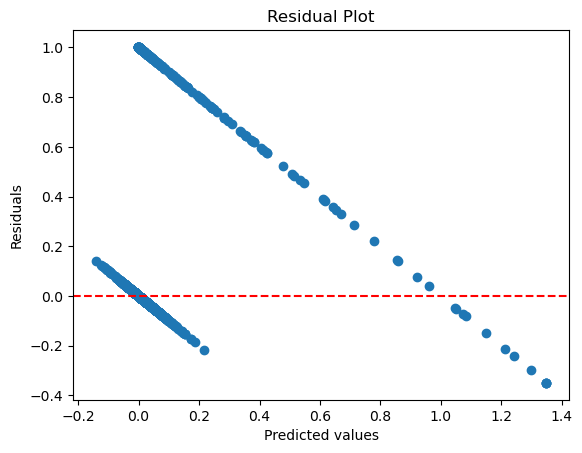

In [25]:
residuals = y_test - y_pred_lin

plt.scatter(y_pred_lin, residuals)
plt.axhline(0, color="red", linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

### 2) Search for best hyperparameters
Use tools like GridSearchCV, RandomizedSearchCV, or model-specific tuning functions to find the best hyperparameters for your first model.

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import pandas as pd


In [37]:
transactions_clean = transactions_transformed.copy()

# Drop ID columns
transactions_clean = transactions_clean.drop(columns=['nameOrig', 'nameDest'])

# One-hot encode 'type'
transactions_clean = pd.get_dummies(transactions_clean, columns=['type'], drop_first=True)

# Then re-define X, y
X = transactions_clean.drop(columns=['isFraud'])
y = transactions_clean['isFraud']

# Redo the split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [40]:
param_dist = {
    'alpha': np.linspace(0.01, 10, 100),
    'max_iter': [100]
}

In [41]:
lasso_model = Lasso()

random_search = RandomizedSearchCV(
    estimator=lasso_model, 
    param_distributions=param_dist,
    n_iter = 100,
    cv = 5
)

In [42]:
random_search.fit(X_train, y_train)

best_lasso = random_search.best_estimator_

y_pred_lasso = best_lasso.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

/opt/anaconda3/envs/ds/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.688e+02, tolerance: 7.790e-02
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/ds/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.630e+02, tolerance: 7.650e-02
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/ds/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

In [43]:
print(f"RandomizedSearchCV - Test MSE for LASSO: {mse_lasso:.2f}")
print(f"RandomizedSearchCV - R2 for LASSO: {r2_lasso:.2f}")

RandomizedSearchCV - Test MSE for LASSO: 0.00
RandomizedSearchCV - R2 for LASSO: 0.06


### 3) Train your model
Select the model with best hyperparameters and generate predictions on your test set. Evaluate your models accuracy, precision, recall, and sensitivity.  

In [44]:
# set up possible values for our hyperparameter
param_dist = {
    # choose alpha between 0.01 to 10
    'alpha': np.linspace(0.01, 10, 100),
    'max_iter': [100]
}

In [45]:

# create an instance of the lasso model
lasso_model = Lasso()

In [46]:
# set up our hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=lasso_model, 
    param_distributions=param_dist,
    n_iter = 10,
    cv = 5
)

In [47]:
# train our model
random_search.fit(X_train, y_train)

/opt/anaconda3/envs/ds/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.663e+02, tolerance: 7.790e-02
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/ds/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.605e+02, tolerance: 7.650e-02
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/ds/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

RandomizedSearchCV(cv=5, estimator=Lasso(),
                   param_distributions={'alpha': array([ 0.01      ,  0.11090909,  0.21181818,  0.31272727,  0.41363636,
        0.51454545,  0.61545455,  0.71636364,  0.81727273,  0.91818182,
        1.01909091,  1.12      ,  1.22090909,  1.32181818,  1.42272727,
        1.52363636,  1.62454545,  1.72545455,  1.82636364,  1.92727273,
        2.02818182,  2.12909091,  2.23      ,  2.33090909,  2.43181818,
        2.53272727,  2.63...
        6.56909091,  6.67      ,  6.77090909,  6.87181818,  6.97272727,
        7.07363636,  7.17454545,  7.27545455,  7.37636364,  7.47727273,
        7.57818182,  7.67909091,  7.78      ,  7.88090909,  7.98181818,
        8.08272727,  8.18363636,  8.28454545,  8.38545455,  8.48636364,
        8.58727273,  8.68818182,  8.78909091,  8.89      ,  8.99090909,
        9.09181818,  9.19272727,  9.29363636,  9.39454545,  9.49545455,
        9.59636364,  9.69727273,  9.79818182,  9.89909091, 10.        ]),
                                        'max_iter': [100]})

In [48]:
# choose the best one from the random search
best_lasso = random_search.best_estimator_

In [49]:
# make predictions
y_pred_lasso = best_lasso.predict(X_test)

In [50]:
# calculate errors
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)


In [51]:
print(f"RandomizedSearchCV - Test MSE for LASSO: {mse_lasso:.2f}")
print(f"RandomizedSearchCV - R2 for LASSO: {r2_lasso:.2f}")

RandomizedSearchCV - Test MSE for LASSO: 0.00
RandomizedSearchCV - R2 for LASSO: 0.06


## Second Model

Create a second machine learning object and rerun steps (2) & (3) on this model. Compare accuracy metrics between these two models. Which handles the class imbalance more effectively?

Create as many code-blocks as needed.

In [52]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report


In [54]:
# Train
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

# Predict probabilities (clip between 0 and 1)
y_pred_lin_prob = lin_model.predict(X_test)
y_pred_lin_class = (y_pred_lin_prob >= 0.5).astype(int)

# Metrics
print("🔹 Linear Regression Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lin_class):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_lin_class):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_lin_prob):.4f}")


🔹 Linear Regression Metrics:
Accuracy: 0.9989
F1 Score: 0.2198
ROC AUC: 0.9564


In [55]:
### from sklearn.ensemble import RandomForestClassifier
### from sklearn.model_selection import GridSearchCV

# Define model and param grid
rf = RandomForestClassifier(random_state=42, class_weight='balanced')  # handles class imbalance
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'max_features': ['sqrt', 'log2']
}

# Grid search
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='f1',
    cv=3,
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_


Fitting 3 folds for each of 16 candidates, totalling 48 fits


In [56]:
# Predict
y_pred_rf = best_rf.predict(X_test)
y_pred_rf_prob = best_rf.predict_proba(X_test)[:, 1]

# Metrics
print("\n🔹 Random Forest Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_rf_prob):.4f}")



🔹 Random Forest Metrics:
Accuracy: 0.9996
F1 Score: 0.8190
ROC AUC: 0.9873


In [57]:
print("\n🔍 Summary Comparison")
print("-------------------------")
print("Linear Regression vs Random Forest")
print(f"Accuracy:   {accuracy_score(y_test, y_pred_lin_class):.4f} vs {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"F1 Score:   {f1_score(y_test, y_pred_lin_class):.4f} vs {f1_score(y_test, y_pred_rf):.4f}")
print(f"ROC AUC:    {roc_auc_score(y_test, y_pred_lin_prob):.4f} vs {roc_auc_score(y_test, y_pred_rf_prob):.4f}")



🔍 Summary Comparison
-------------------------
Linear Regression vs Random Forest
Accuracy:   0.9989 vs 0.9996
F1 Score:   0.2198 vs 0.8190
ROC AUC:    0.9564 vs 0.9873


### (Bonus/Optional) Third Model

Create a third machine learning model and rerun steps (2) & (3) on this model. Which model has the best predictive capabilities? 

Create as many code-blocks as needed.